# **Capstone Module 3**

Capstone Module 3 (Machine Learning)

Membuat Machine Learning untuk mengelola dan membuat pemodelan dari data yang telah diberikan.
Data yang akan digunakan adalah data Travel Insurance

sumber data : [Data Travel Insurance](https://drive.google.com/file/d/1emDTGFvku7UuuVT3W-EmEvg3i61QrIU-/view)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **Business Problem Understanding**

**Context**

Asuransi perjalanan adalah asuransi yang memberikan perlindungan terhadap segala risiko yang mungkin terjadi ketika seseorang melakukan perjalanan, baik di dalam negeri maupun di luar negeri. Asuransi ini diutamakan bagi orang-orang yang kerap memiliki mobilitas tinggi, seperti bepergian ke luar kota hingga ke luar negeri. Kepemilikan perlindungan ini berfungsi untuk menekan dampak finansial dari risiko kerugian yang mungkin terjadi saat perjalanan tersebut. source: https://www.qoala.app/id/blog/asuransi/umum/apa-itu-asuransi-perjalanan/

Bebebrapa manfaat yang didapatkan dari asuransi perjalanan atau Travel Insurance adalah Ganti Rugi Atas Kerusakan atau Kehilangan Bagasi, Ganti Rugi Keterlambatan atau Pembatalan Perjalanan, Biaya Pengobatan yang Ditanggung, Santunan Kecelakaan dan Kematian, Menanggung Kerugian Finansial Akibat Faktor Lain (Segala bentuk kerugian baik fisik, mental, serta finansial akan ditanggung oleh pihak asuransi).

**Problem Statement**

Salah satu tantangan terbesar bagi pihak jasa Travel Insurance adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial bagi pemilik jasa, serta dapat memberikan pengalaman positif terhadap pengguna jasa.

Mengingat bahwa harga penawaran harus ideal, untuk menentukan harga jasa mereka, dengan hanya memberikan petunjuk minimal dengan tujuan memungkinkan Jasa Travel Insurance dapat menawarkan benefit yang diberikan dengan membandingkan kelebihan dengan jasa serupa di beberapa penyedia jasa Travel Insurance lainnya. Dari alasan tersebut digunakan untuk mendapatkan harga yang kompetitif. Penyedia Jasa Travel Insurance dapat memasukkan harga yang lebih tinggi untuk fasilitas tambahan apa pun yang mereka anggap perlu. Dengan bertambahnya penyedia jasa Travel Insurance, untuk menentukan harga yang tepat dan dapat tetap kompetitif yang akan ditawarkan sangatlah penting. Setelah pengguna jasa menggunakan jasa travel insurance maka langkah selanjutnya adalah mereka akan menentukan apakah mereka akan melakukan claim terhadap jasa tersebut ataupun tidak. 

**Goals**

Berdasarkan permasalahan tersebut, Penyedia jasa Travel Insurance harus atau sudah memiliki 'tool' yang dapat memprediksi serta membantu mereka mereka (dalam hal ini Travel Insurance) untuk dapat **Mengetahui Klasiifikasi Bagi Pengguna yang Claim Asuransi Pada Penyedia Jasa Travel Insurance**. Adanya perbedaan pada klasifikasi tersebut dapat menentukan profit bagi penyedia jasa Travel Insurance.

**Analytic Approach**

Dari pembahasan diatas maka yang saya akan lakukan  adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan Travel Insurance satu dengan yang lainnya. 

Selanjutnya, saya akan membangun suatu model Klasifikasi yang akan membantu Penyedia jasa Travel Insurance untuk dapat menyediakan 'tool' prediksi yang mana dapat menentukan klasifikasi mana yang akan dikelompokan bagi pengguna jasa.

**Metric Evaluation**

Metrik Evaluasi yang akan digunakan adalah Precision, Recall, F1 Score. Dan difokuskan kepada Recall

Claim Yes = Positif
Kesalahan Tipe I (False Positif) - Menerima hipotesis nol palsu (Penumpang Aktual Tidak Claim tetapi diprediksi Claim)

Kesalahan Tipe II (False Negatif) - Menolak hipotesis nol yang benar (Penumpang Aktual Claim Diprediksi Tidak Claim)

Fokusnya adalah untuk mengetahui kesalahan Tipe I dan II karena akan menyebabkan lebih banyak kerugian.
Oleh karena itu nilai Recall yang tinggi, tanpa mengorbankan nilai presisi yang rendah akan menjadi tujuannya. Menyeimbangkan recall dan precssion 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer # digunakan untuk cek missing Value
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score # Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

In [2]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [3]:
travelDesc = []
for i in df.columns:
    travelDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(travelDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Agency,object,0,0.00,16,"[LWC, TTW]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Bronze Plan, Travel Cruise Protect Family]"
4,Gender,object,31647,71.39,2,"[F, M]"
5,Duration,int64,0,0.00,437,"[4815, 121]"
6,Destination,object,0,0.00,138,"[EGYPT, UNITED ARAB EMIRATES]"
7,Net Sales,float64,0,0.00,1006,"[8.77, 1.55]"
8,Commision (in value),float64,0,0.00,915,"[10.15, 8.36]"
9,Age,int64,0,0.00,89,"[67, 23]"


# Target Distribution Check

In [105]:
df.Claim.value_counts()

0    43602
1      677
Name: Claim, dtype: int64

# Check Missing Value

In [4]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

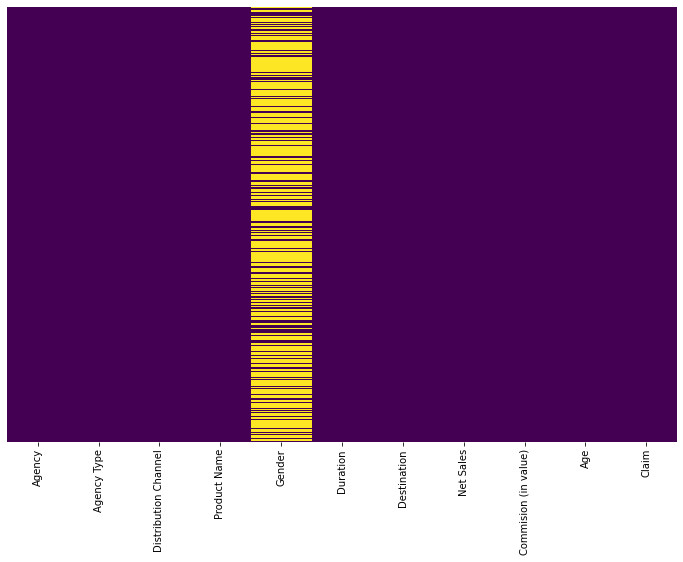

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(),cmap='viridis', yticklabels=False, cbar=False)
plt.show()

In [81]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600,0.015273
std,109.153961,48.661970,19.625637,13.954926,0.122636
min,-1.000000,-357.500000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.500000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000
max,4881.000000,810.000000,283.500000,118.000000,1.000000


In [82]:
df = df[df.Duration > 0]

# QUICK EDA FOR FEATURE SELECTION

### Hipotesa Awal :

- Agency Type Berpengaruh terhadap Claim
- Duration Berpengaruh terhadap Claim
- Net Sales berpengaruh terhadap Claim
- Commision (In Value) Berpengaruh terhadap Claim

In [54]:
df['Claim'] = df['Claim'].map({'Yes':1, 'No':0})

# Agency Type Check

In [58]:
df[['Agency Type','Claim']].groupby(['Agency Type']).count()

,Claim
Agency Type,
Airlines,12215
Travel Agency,32113


In [59]:
(df[['Agency Type','Claim']].groupby(['Agency Type']).mean()*100)

,Claim
Agency Type,
Airlines,3.593942
Travel Agency,0.741133


- Agency Type : Airlines Memiliki Claim Rate Sebesar 3.6 % atau dengan kata lain sebanyak 96.4 % passanger tidak melakukan claim
- Agency memiliki pengaruh terhadap Claim Rate

# Duration Check

In [87]:
Duration_bin = [0, 60, 120, df['Duration'].max()] ## Membuat Kelompok Durasi

In [88]:
Labels = ['Low', 'Medium', 'High'] ## Label untuk kelompok Durasi

In [91]:
df['Duration_bin'] = pd.cut(df['Duration'], bins = Duration_bin, labels = Labels)

In [95]:
(df[['Duration_bin','Claim']].groupby(['Duration_bin']).mean()*100).sort_values('Claim', ascending=False)

,Claim
Duration_bin,
High,4.115655
Medium,1.533101
Low,1.242075


In [98]:
df[['Duration_bin','Claim']].groupby(['Duration_bin']).count()

,Claim
Duration_bin,
Low,34700
Medium,5740
High,3839


In [61]:
(df[['Duration','Claim']].groupby(['Duration']).mean()*100)

,Claim
Duration,
-1,0.000000
0,0.000000
1,0.000000
2,0.469484
3,0.909843
...,...
4831,0.000000
4844,0.000000
4847,0.000000


# NET SALES Check

In [99]:
Sales_bin = [df['Net Sales'].min(),0, df['Net Sales'].max()] 

In [100]:
Labels = ['Negatif', 'Positif'] ## Label untuk kelompok NET SALES

In [101]:
df['Sales_bin'] = pd.cut(df['Net Sales'], bins = Sales_bin, labels = Labels)

In [103]:
(df[['Sales_bin','Claim']].groupby(['Sales_bin']).mean()*100).sort_values('Claim', ascending=False)

,Claim
Sales_bin,
Positif,1.592716
Negatif,0.000000


- Rata rata dari Net Sales claim rate Positif adalah  1.5% dengan kata lain sebanyak 98.5 % orang tidak melakukan claim 
- Net Sales memiliki pengaruh terhadap Claim Rate

# Commision (In Value) Check

In [75]:
df[['Commision (in value)','Claim']].groupby(['Commision (in value)']).count()

,Claim
Commision (in value),
0.00,24725
0.02,8
0.04,1
0.05,13
0.09,12
...,...
208.16,3
209.95,2
210.21,24


In [78]:
(df[['Commision (in value)','Claim']].groupby(['Commision (in value)']).mean()*100).sort_values('Commision (in value)', ascending=False)

,Claim
Commision (in value),
283.50,0.000000
262.76,0.000000
210.21,8.333333
209.95,0.000000
208.16,0.000000
...,...
0.09,0.000000
0.05,0.000000
0.04,0.000000


- Commision (in value) berpengaruh terhadap Claim Rates - Paling tinggi Claim Rates nya  210.21 ==> 8.3%

# Correlation matrix

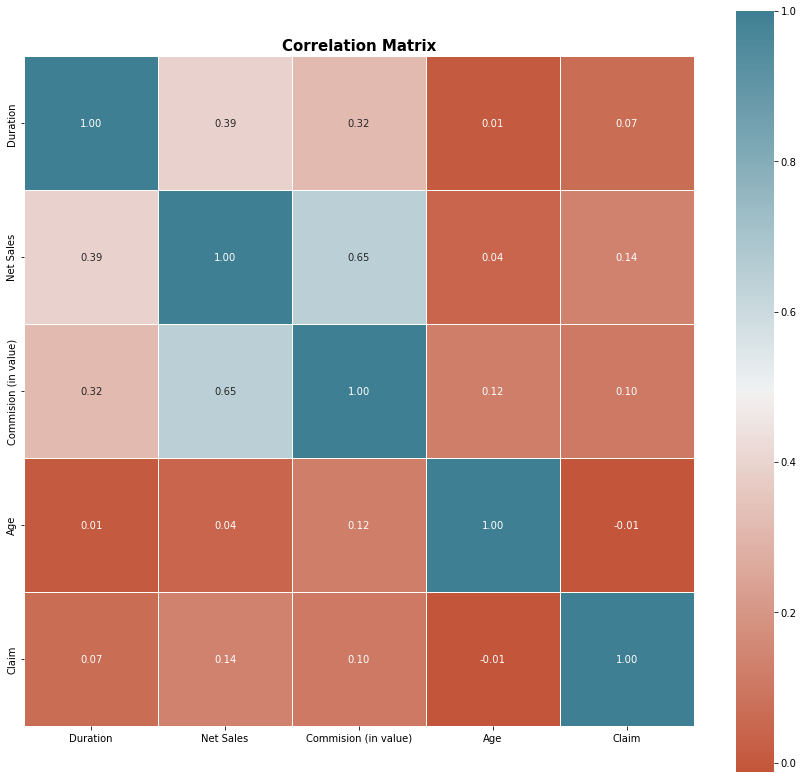

In [79]:
plt.figure(figsize=(15, 14))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Dari hasil korelasi matrix menunjukan tidak ada fitur yang korelasi tinggi, tetapi dapat dilihat bahwa ada beberapa fitur yang memiliki korelasi positif dan negaitf, yaitu :

Korelasi Positif (+) :
- Duration
- Net Sales
- Commision (in value)             

Korelasi Negatif (-)
- Age

Korelasi matrix digunakan untuk melihat hubungan antar kolom yang bertipe numerik, disini saya menggunakan pearson correlation dikarenakan saya ingin melihat linear correlation dimana pearson correlation sangat cocok digunakan untuk mencari hubungan linear correlation.

# PIPELINE (PREPROCESSING)

# DATA EXPLORATION

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [6]:
X = df.drop(columns=['Claim','Agency','Product Name', 'Destination','Gender'])
y = df['Claim'] 

# Feature Selection
Berikut ini merupakan kolom - kolom yang saya gunakan sebagai feature untuk training model machine learning :
    
    - Agency Type
    - Distribution Channel
    - Duration
    - Net Sales 
    - Comission (in value) 
    - Age

Berikut Kolom- Kolom yang tidak saya gunakan ketika menggunakan training :
    
    - Agency
    - Product Name
    - Destination
    - Gender
    
Alasan saya tidak menggunakan kolom tersebut karena beberapa kolom memiliki fungsi yang sama dengan kolom lain seperti agency memiliki fungsi yang sama seperti agency type. Kolom Gender tidak digunakan karena memiliki missing value diatas 70 % dari total data. Sedangkan kolom lain saya drop berdasarkan domain knowledge (Destinaation, Product Name)

Kolom **Claim** digunakan sebagai Target yang nanti digunakan dalam Machine Learning

# DATA SET SPLITTING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = .20, random_state = 42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35462 entries, 11041 to 33657
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency Type           35462 non-null  object 
 1   Distribution Channel  35462 non-null  object 
 2   Duration              35462 non-null  int64  
 3   Net Sales             35462 non-null  float64
 4   Commision (in value)  35462 non-null  float64
 5   Age                   35462 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.9+ MB


# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
num_columns = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
cat_columns = ['Agency Type', 'Distribution Channel']
 

numeric_pipeline = Pipeline([
#    ('Nama Instruksi', Fungsi yang digunakan), <- Optional
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()) 
#    ('poly', PolynomialFeatures(degree=2, include_bias = False)), <- Optional
#    ('power', PowerTransformer(method='yeo-johnson')) <- Optional
])


categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])


preprocessor = ColumnTransformer([
    ## ('Nama Instruksi', Fungsi instruksi, kolom)
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns),
    # ('encode', ce.BinaryEncoder(), ['Destination'])
])


pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

In [12]:
X_train.head()

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age
11041,Travel Agency,Online,3,20.00,0.00,36
27336,Airlines,Online,16,1.93,0.54,48
30332,Travel Agency,Online,2,10.00,0.00,36
17529,Travel Agency,Online,7,39.60,23.76,30
44125,Travel Agency,Online,3,16.00,0.00,30


In [13]:
pipe_KNN.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                 

In [14]:
y_knn = pipe_KNN.predict(X_test)

In [15]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      8731
         Yes       0.00      0.00      0.00       135

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866



# TUNING KNN

In [16]:
param_KNN = {
    'algo__n_neighbors' : np.arange(1, 51, 2),
    'algo__weights': ['uniform','distance'],
    'algo__p' : [1,2]
}

In [17]:
skf = StratifiedKFold(n_splits=4) # Cross validation , untuk mngetahui kestabilan data

In [18]:
GSS_KNN = GridSearchCV(pipe_KNN, param_KNN, cv = skf, scoring = 'f1', n_jobs=-1, verbose=1)

In [19]:
GSS_KNN.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                  

In [20]:
KNN_Tuned = GSS_KNN.best_estimator_

In [21]:
y_ts_KNN = KNN_Tuned.predict(X_test)

In [22]:
print(classification_report(y_test, y_ts_KNN))

              precision    recall  f1-score   support

          No       0.99      0.99      0.99      8731
         Yes       0.05      0.04      0.05       135

    accuracy                           0.97      8866
   macro avg       0.52      0.52      0.52      8866
weighted avg       0.97      0.97      0.97      8866



# RANDOM FOREST CLASSIFIER

In [23]:
num_columns = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
cat_columns = ['Agency Type', 'Distribution Channel',]
 

numeric_pipeline = Pipeline([
#    ('Nama Instruksi', Fungsi yang digunakan), <- Optional
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
#    ('poly', PolynomialFeatures(degree=2, include_bias = False)), <- Optional
#    ('power', PowerTransformer(method='yeo-johnson')) <- Optional
])


categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])


preprocessor = ColumnTransformer([
    ## ('Nama Instruksi', Fungsi instruksi, kolom)
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns),
    # ('encode', ce.BinaryEncoder(), ['Destination'])
])


pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

In [24]:
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                 

In [25]:
y_svm = pipe_RF.predict(X_test)

In [26]:
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      8731
         Yes       0.07      0.01      0.02       135

    accuracy                           0.98      8866
   macro avg       0.53      0.51      0.51      8866
weighted avg       0.97      0.98      0.98      8866



# Tuning Random Forest

In [27]:
RandomForestClassifier()

RandomForestClassifier()

In [28]:
param_RF = {
    "algo__n_estimators" : np.arange(100, 1001, 200),
    "algo__max_depth" : np.arange(5, 50, 5),
    "algo__min_samples_leaf" : np.arange(1, 21, 2), 
    # "algo__max_features" : np.arange(0, 1, 0.2)
}

In [29]:
GS_RF = GridSearchCV(pipe_RF, param_RF, cv = 3, n_jobs=-1, verbose = 3, scoring = 'precision')

In [34]:
GS_RF.fit(X_train, y_train)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
             

In [35]:
RF_Tuned = GS_RF.best_estimator_

In [36]:
y_RF = RF_Tuned.predict(X_test)

In [37]:
print(classification_report(y_test, y_RF))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      8731
         Yes       0.00      0.00      0.00       135

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866



# CONCLUSION

Hasil dari 2 Metode yang saya gunakan didapatkan hasil evaluation matrix yang kurang baik dikarenakan jumlah kolom dan data yang sedikit
Alasan Melakukan Tuning data adalah untuk mendapatakan improvement parameter terbaik

# RECOMENDATION
UNTUK MEMPERBAGUS ATAU MEMPERBAIKI MODEL MAKA DISARANKAN ATAU DI REKOMENDASIKAN UNTUK MENAMBAHKAN :
1. Kolom
2. Jumlah Data
3. Menggunakan Algortima Lain yang memiliki error terkecil dan mencoba kombinasi hyper parameter lain